In [1]:
#imports and data

import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

dataset_1 = pq.ParquetDataset("hitdata7days")
dataset_2 = pq.ParquetDataset("hitdata7days 2")

columns = ['ip','newvisit','hourlyvisitor','checkoutthankyouflag'\
          ,'productfindingmethods', 'evar23', 'post_evar30', \
           'post_evar22', 'post_evar19', 'evar83', 'prop29', 'visitnumber', 'visitpagenum']
df_all = dataset_1.read(columns=columns).combine_chunks()
df_all =df_all.to_pandas()
df_all

,ip,newvisit,hourlyvisitor,checkoutthankyouflag,productfindingmethods,evar23,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum,visitday
0,173.224.189.135,0,1,0,None,None,0.1315,11,3.9,None,None,6,168,10
1,104.52.174.100,0,0,0,None,5067566325,0.7894,6,4.8,529,Mature,1,2,10
2,68.106.111.203,0,0,0,None,3945406345,None,0,0,None,Prospect,10,143,10
3,12.138.10.179,0,0,0,None,3239177254,29.375,4,4.8,507,Mature,2,55,10
4,173.205.178.243,0,0,0,None,5121337428,0.0986,1,5,455,Emerging,2,34,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458604,71.94.28.69,0,0,0,wid,3887959950,12.9934,0,0,503,Mature,4,17,10
6458605,97.114.97.145,0,0,0,None,2829062646,0.1973,161,4.2,485,Mature,61,181,10
6458606,66.169.187.66,1,1,0,None,2875838112,0.7565,None,None,491,Mature,9,1,10
6458607,24.146.196.77,0,0,0,None,3658770565,0.3947,3,3.7,484,Mature,25,24,10


In [2]:
#Subset and cleaning
df_subset = df_all.iloc[::-1]
df_subset = df_subset.iloc[1: , :]


In [3]:
#cleaning columns: Product finding methods, search_terms, 
df_subset.loc[(df_subset.productfindingmethods == 'None'),'productfindingmethods']='0'
df_subset.loc[(df_subset.productfindingmethods == 'Search'),'productfindingmethods']='2'
df_subset.loc[(df_subset.productfindingmethods == 'Browse'),'productfindingmethods']='1'
df_subset.loc[(df_subset.productfindingmethods == 'wid'),'productfindingmethods']='1'
df_subset.loc[(df_subset.productfindingmethods.isna()),'productfindingmethods']='0'

df_subset['productfindingmethods'] = pd.to_numeric(df_subset['productfindingmethods']) 
df_subset = df_subset.dropna()

In [4]:
df_subset = df_subset[df_subset['evar83'] != '']
df_subset_1 = df_subset.loc[df_subset['checkoutthankyouflag'] == 0]
df_subset_1 = df_subset_1.drop_duplicates(subset=['evar23'])
df_subset_2 = df_subset.loc[df_subset['checkoutthankyouflag'] == 1]
df_subset_1['prop29'].replace(['FSApproved', 'Mature', 'Prospect', \
                               'Emerging', 'New', 'FSRetry', 'Graduate-FS',\
                               'FreshStart', 'FSGrad', 'FSCleanup', 'Cash'], \
                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df_subset_2['prop29'].replace(['FSApproved', 'Mature', 'Prospect', 'Emerging', 
                               'New', 'FSRetry', 'Graduate-FS', 'FreshStart', 'FSGrad',\
                               'FSCleanup', 'Cash'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

/var/folders/q6/70yg_ggj7rd9swnlfjc49r700000gn/T/ipykernel_36905/2671119136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_2['prop29'].replace(['FSApproved', 'Mature', 'Prospect', 'Emerging',


In [5]:
df_subset_2

,ip,newvisit,hourlyvisitor,checkoutthankyouflag,productfindingmethods,evar23,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum,visitday
6458388,68.97.71.88,0,0,1,0,3884300855,17.0394,0,0,475,1,2,84,10
6457363,104.28.97.32,0,0,1,0,3900660245,24.4407,106,4.5,476,3,1,85,10
6456970,174.211.235.177,0,0,1,0,3894697673,0.1644,669,4.2,492,1,11,53,10
6456193,174.58.104.128,0,0,1,0,2850580426,7.1381,5,5,407,1,17,79,10
6455060,174.239.112.33,0,0,1,0,5081025396,8.5197,2,5,483,1,19,127,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,24.116.62.187,0,0,1,0,2157105620,10,0,0,509,1,3,596,10
1412,107.213.254.105,0,0,1,0,2272452737,3.3552,1,5,480,1,2,53,10
1196,73.245.193.241,0,0,1,0,3592465130,0.7565,74,4.6,489,1,57,31,10
1034,23.28.177.215,0,0,1,0,3884305954,10.6907,0,0,468,6,2,291,10


In [6]:
df_subset = pd.concat([df_subset_1.sample(n=len(df_subset_2.index), random_state=148), df_subset_2])
#df_subset = pd.concat([df_subset_1.sample(n=10000), df_subset_2.sample(n=10000)])
df_subset = df_subset.sample(frac = 1, random_state=148)

In [7]:
df_subset

,ip,newvisit,hourlyvisitor,checkoutthankyouflag,productfindingmethods,evar23,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum,visitday
3769105,174.208.48.105,0,0,0,0,3907607671,6.6447,5,5,486,1,18,19,10
3889302,172.58.8.98,0,0,0,0,3664146518,1.0197,1,4,453,0,14,8,10
6042082,174.197.135.102,0,0,0,2,2774556092,10.6907,5,4.4,518,1,4,190,10
1483647,73.133.9.32,0,0,0,0,2923768282,6.7105,11,4.5,445,1,3,17,10
4704273,174.215.145.94,0,0,0,0,2816711506,19.8684,29,4.7,499,1,17,79,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968681,64.203.206.1,0,0,0,0,2890226696,0.3289,1,5,468,1,1,3,10
532162,192.63.144.212,0,0,0,0,3871267902,0.8223,9,4.4,469,3,6,21,10
4655916,76.143.109.83,0,0,1,0,5153838325,2.171,2,4.5,387,3,11,129,10
2713162,174.104.17.222,0,0,1,0,2831998954,1.3486,4,5,494,1,26,93,10


In [8]:
#Setting up Logistic Regression
x = df_subset.drop(['evar23', 'checkoutthankyouflag', 'ip','visitday'], axis=1)
x = np.asarray(x).astype('float32')
y = df_subset['checkoutthankyouflag']
y = np.asarray(y).astype('float32')
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=148)

In [9]:
model = LogisticRegression(solver='lbfgs', max_iter=200)

          
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
y_test_prediction_probabilities = model.predict_proba(x_test)

In [11]:
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']

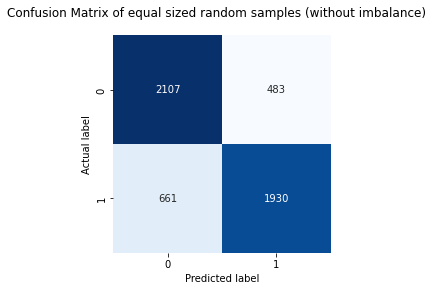

In [12]:

import seaborn as sns
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.suptitle("Confusion Matrix of equal sized random samples (without imbalance)")
plt.show()

In [13]:
#trying out when the imbalance is present

df_subset = pd.concat([df_subset_2.sample(n=int(len(df_subset_1.index)*0.03 ), random_state=120), df_subset_1])
#df_subset = pd.concat([df_subset_1.sample(n=10000), df_subset_2.sample(n=10000)])
df_subset = df_subset.sample(frac = 1, random_state=148)

In [14]:
#Setting up Logistic Regression
xtest = df_subset.drop(['evar23', 'checkoutthankyouflag', 'ip','visitday'], axis=1)
xtest = np.asarray(xtest).astype('float32')
ytest = df_subset['checkoutthankyouflag']
ytest = np.asarray(ytest).astype('float32')

In [15]:
y_test_prediction_probabilities_imbalanced = model.predict_proba(x_test)

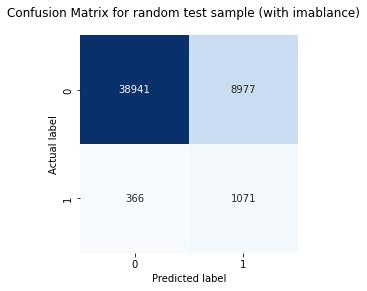

In [16]:
ypredicted = model.predict(xtest) > 0.5
mat = confusion_matrix(ytest, ypredicted)
labels = ['0', '1']


import seaborn as sns
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.suptitle("Confusion Matrix for random test sample (with imablance)")
plt.show()

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

df['Cluster'] = y

print(df.head())

In [18]:
df= df_subset.drop(['evar23', 'ip','visitday','checkoutthankyouflag'], axis=1)

In [19]:
df

,newvisit,hourlyvisitor,productfindingmethods,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum
2019650,0,0,0,0.4934,0,0,467,1,15,72
2968826,0,0,0,13.6184,0,0,499,5,2,24
4038547,0,0,0,12.0723,1,5,530,1,7,71
1747390,0,0,0,12.0723,1,1,524,1,35,18
230862,0,0,0,5.8223,2225,4,351,1,7,16
...,...,...,...,...,...,...,...,...,...,...
3188866,0,0,0,0.1973,6,4,496,3,42,2
1543585,1,1,0,0.1315,0,0,519,3,116,1
1746549,0,0,0,0.1973,13369,4.6,485,1,25,30
1747187,0,0,0,4.5723,45,4.6,483,1,85,27


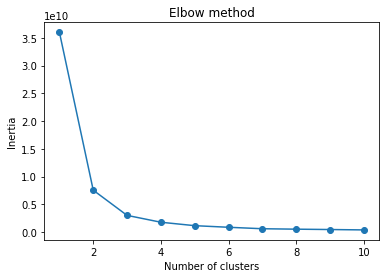

In [20]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
model = KMeans(n_clusters = 6)
model.fit(df)
model.cluster_centers_


array([[8.03797468e-02, 8.86075949e-02, 1.70253165e-01, 8.58395715e+00,
        6.51441139e+02, 4.49101266e+00, 4.79904430e+02, 2.05189873e+00,
        2.76949367e+01, 4.09265823e+01],
       [1.56250000e-02, 3.12500000e-02, 1.87500000e-01, 1.01397641e+01,
        8.75628125e+03, 4.19843750e+00, 4.76171875e+02, 2.43750000e+00,
        1.69531250e+01, 3.28750000e+01],
       [9.25170354e-02, 1.00593085e-01, 2.13910154e-01, 8.58713302e+00,
        2.20574157e+01, 3.21737823e+00, 4.78995310e+02, 2.00586775e+00,
        2.83677547e+01, 3.96550013e+01],
       [1.25000000e-01, 1.25000000e-01, 2.70833333e-01, 8.43059452e+00,
        2.07370000e+04, 4.90000000e+00, 4.82437500e+02, 1.66666667e+00,
        2.23750000e+01, 2.75416667e+01],
       [8.00000000e-02, 9.33333333e-02, 2.26666667e-01, 7.79118035e+00,
        5.39320000e+03, 4.32400000e+00, 4.76813333e+02, 1.92000000e+00,
        2.61066667e+01, 2.63200000e+01],
       [1.50000000e-01, 1.75000000e-01, 7.50000000e-02, 1.09933775e+01,
   

In [22]:
df_subset["kmeans_cluster"] = model.labels_

In [23]:
print(sum((df_subset.loc[df_subset['kmeans_cluster'] == 0].\
           checkoutthankyouflag))/len(df_subset.loc[df_subset['kmeans_cluster'] == 0].checkoutthankyouflag))
print(sum((df_subset.loc[df_subset['kmeans_cluster'] == 1].\
           checkoutthankyouflag))/len(df_subset.loc[df_subset['kmeans_cluster'] == 0].checkoutthankyouflag))
print(sum((df_subset.loc[df_subset['kmeans_cluster'] == 2].\
           checkoutthankyouflag))/len(df_subset.loc[df_subset['kmeans_cluster'] == 0].checkoutthankyouflag))
print(sum((df_subset.loc[df_subset['kmeans_cluster'] == 3].\
           checkoutthankyouflag))/len(df_subset.loc[df_subset['kmeans_cluster'] == 0].checkoutthankyouflag))

0.03481012658227848
0.0018987341772151898
0.8677215189873417
0.0006329113924050633


In [24]:
df_test_subset = pd.concat([df_subset_1.sample(n=len(df_subset_2.index), random_state=100), df_subset_2])
df_test= df_test_subset.drop(['evar23', 'ip','visitday','checkoutthankyouflag'], axis=1)

In [25]:
model.predict(df_test)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)